In [107]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


In [108]:

from sqlalchemy import create_engine
import pandas as pd

# Database connection parameters from docker-compose.yml
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'postgres'

# Create a connection to the PostgreSQL database using psycopg2


try:
    engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
    connection = engine.connect()
    print("Connection to PostgreSQL DB successful")
except Exception as e:
    print(f"Error: {e}")
finally:
    if connection:
        connection.close()

Connection to PostgreSQL DB successful


In [85]:
from sqlalchemy import create_engine, Column, Integer, String, Date, Boolean
from sqlalchemy.orm import declarative_base
from sqlalchemy.exc import SQLAlchemyError

# Database connection parameters
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'postgres'

engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
# # Initialize the declarative base (for SQLAlchemy ORM models)
# Base = declarative_base()

# # Define Stock Dimension Table
# class StockDimension(Base):
#     __tablename__ = 'stock_dimension'
    
#     stock_id = Column(Integer, primary_key=True)
#     stock_symbol = Column(String(10), nullable=False)
#     company_name = Column(String(255), nullable=False)
#     sector = Column(String(100))
#     currency = Column(String(10))
#     exchange = Column(String(50))

# # Define Date Dimension Table
# class DateDimension(Base):
#     __tablename__ = 'date_dimension'
    
#     date_id = Column(Integer, primary_key=True)
#     full_date = Column(Date, nullable=False)
#     day_of_week = Column(String(20))
#     month = Column(String(20))
#     quarter = Column(String(5))
#     year = Column(Integer)
#     is_holiday = Column(Boolean)

# # Define Sector Dimension Table
# class SectorDimension(Base):
#     __tablename__ = 'sector_dimension'
    
#     sector_id = Column(Integer, primary_key=True)
#     sector_name = Column(String(100), nullable=False)

# # Define Exchange Dimension Table
# class ExchangeDimension(Base):
#     __tablename__ = 'exchange_dimension'
    
#     exchange_id = Column(Integer, primary_key=True)
#     exchange_name = Column(String(100), nullable=False)
#     country = Column(String(100))

# # Function to create schema and tables
# def create_schema_and_tables():
#     try:
#         # Create a connection to the PostgreSQL database
#         engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
        
#         # Use a context manager to handle connection and transaction
#         with engine.connect() as connection:
#             print("Connection to PostgreSQL DB successful")
            
#             # Start a transaction
#             with connection.begin():
#                 # Create schema if it doesn't exist
#                 connection.execute("CREATE SCHEMA IF NOT EXISTS finance_schema;")
#                 print("Schema 'finance_schema' created successfully!")
                
#                 # Create tables in the specified schema directly
#                 Base.metadata.create_all(engine, checkfirst=True)  # checkfirst ensures tables are created only if they don't exist

#                 # Set schema for all tables
#                 for table in Base.metadata.sorted_tables:
#                     connection.execute(f'ALTER TABLE {table.name} SET SCHEMA finance_schema;')

#                 print("All dimension tables created successfully in 'finance_schema'!")

#     except SQLAlchemyError as e:
#         print(f"Error: {e}")

#     finally:
#         print("PostgreSQL connection closed")

# # Execute the function to create schema and tables
# create_schema_and_tables()


In [109]:
from sqlalchemy import create_engine, text
from sqlalchemy.exc import SQLAlchemyError
import pandas as pd

# Database connection parameters
db_user = 'cosc'
db_password = 'cosc436'
db_host = 'postgres'  # Use the service name defined in docker-compose.yml
db_port = '5432'
db_name = 'postgres'

# Create the database engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Query to retrieve all schemas
query_schemas = "SELECT schema_name FROM information_schema.schemata;"

# Execute the query and load the results into a DataFrame for schemas
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_schemas))
        schemas = pd.DataFrame(result.fetchall(), columns=['schema_name'])
        print("Schemas:") 
        print(schemas)
except SQLAlchemyError as e:
    print("Error while fetching schemas:", e)

# Specify the schema name to list tables
schema_name = 'finance_schema'  # Change this to your actual schema name

# Query to retrieve all tables in the specified schema
query_tables = f"""
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = '{schema_name}';
"""

# Execute the query and load the results into a DataFrame for tables
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_tables))
        tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
        print(f"\nTables in schema '{schema_name}':")
        print(tables)
except SQLAlchemyError as e:
    print("Error while fetching tables:", e)


Schemas:
          schema_name
0              public
1     pg_toast_temp_4
2           pg_temp_4
3      finance_schema
4     pg_toast_temp_3
5           pg_temp_3
6  information_schema
7          pg_catalog
8            pg_toast

Tables in schema 'finance_schema':
                 table_name
0          sector_dimension
1        exchange_dimension
2           stock_dimension
3           fact_stock_data
4            date_dimension
5  moving_average_crossover
6         portfolio_history
7       backtesting_results


In [5]:
# def fetch_schemas(engine):
#     query = "SELECT schema_name FROM information_schema.schemata;"
#     try:
#         with engine.connect() as connection:
#             result = connection.execute(text(query))
#             schemas = pd.DataFrame(result.fetchall(), columns=['finance_schema'])
#             return schemas
#     except SQLAlchemyError as e:
#         print("Error while fetching schemas:", e)
#         return None

# # Function to fetch tables in a specified schema
# def fetch_tables(engine, schema_name):
#     query = f"""
#     SELECT table_name 
#     FROM information_schema.tables 
#     WHERE table_schema = '{schema_name}';
#     """
#     try:
#         with engine.connect() as connection:
#             result = connection.execute(text(query))
#             tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
#             return tables
#     except SQLAlchemyError as e:
#         print("Error while fetching tables:", e)
#         return None

# # Fetch and display schemas
# schemas = fetch_schemas(engine)
# print("Schemas:")
# print(schemas)

# # Specify the schema name to list tables
# schema_name = 'finance_schema'  # Change this to your actual schema name

# # Fetch and display tables in the specified schema
# tables = fetch_tables(engine, schema_name)
# print(f"\nTables in schema '{schema_name}':")
# print(tables)

In [110]:
try:
    with engine.connect() as connection:
        result = connection.execute(text(query_tables))
        tables = pd.DataFrame(result.fetchall(), columns=['table_name'])
        print(f"\nTables in schema '{schema_name}':")
        print(tables)
except SQLAlchemyError as e:
    print("Error while fetching tables:", e)

# Function to fetch table details
def fetch_table_details(engine, schema_name, table_name):
    query_table_details = f"""
    SELECT 
        column_name, 
        data_type, 
        character_maximum_length, 
        is_nullable,
        column_default
    FROM 
        information_schema.columns 
    WHERE 
        table_schema = '{schema_name}' 
        AND table_name = '{table_name}';
    """
    try:
        with engine.connect() as connection:
            result = connection.execute(text(query_table_details))
            table_details = pd.DataFrame(result.fetchall(), columns=['column_name', 'data_type', 'character_maximum_length', 'is_nullable', 'column_default'])
            return table_details
    except SQLAlchemyError as e:
        print(f"Error while fetching details for table '{table_name}':", e)
        return None

# Function to fetch foreign key relationships
def fetch_foreign_keys(engine, schema_name, table_name):
    query_foreign_keys = f"""
    SELECT 
        tc.constraint_name, 
        kcu.column_name, 
        ccu.table_name AS foreign_table_name,
        ccu.column_name AS foreign_column_name
    FROM 
        information_schema.table_constraints AS tc 
    JOIN 
        information_schema.key_column_usage AS kcu 
      ON tc.constraint_name = kcu.constraint_name
    JOIN 
        information_schema.constraint_column_usage AS ccu 
      ON ccu.constraint_name = tc.constraint_name
    WHERE 
        tc.constraint_type = 'FOREIGN KEY' 
        AND kcu.table_schema = '{schema_name}' 
        AND kcu.table_name = '{table_name}';
    """
    try:
        with engine.connect() as connection:
            result = connection.execute(text(query_foreign_keys))
            foreign_keys = pd.DataFrame(result.fetchall(), columns=['constraint_name', 'column_name', 'foreign_table_name', 'foreign_column_name'])
            return foreign_keys
    except SQLAlchemyError as e:
        print(f"Error while fetching foreign keys for table '{table_name}':", e)
        return None

# Fetch and display details for each table
if not tables.empty:
    for index, row in tables.iterrows():
        table_name = row['table_name']
        print(f"\nDetails for table '{table_name}':")
        
        # Fetch and print table details
        details = fetch_table_details(engine, schema_name, table_name)
        if details is not None:
            print(details)
        
        # Fetch and print foreign key relationships
        fk_relationships = fetch_foreign_keys(engine, schema_name, table_name)
        if fk_relationships is not None and not fk_relationships.empty:
            print(f"\nForeign key relationships for table '{table_name}':")
            print(fk_relationships)
        else:
            print(f"No foreign key relationships found for table '{table_name}'.")


Tables in schema 'finance_schema':
                 table_name
0          sector_dimension
1        exchange_dimension
2           stock_dimension
3           fact_stock_data
4            date_dimension
5  moving_average_crossover
6         portfolio_history
7       backtesting_results

Details for table 'sector_dimension':
   column_name          data_type  character_maximum_length is_nullable  \
0    sector_id            integer                       NaN          NO   
1  sector_name  character varying                     100.0          NO   

                                      column_default  
0  nextval('finance_schema.sector_dimension_secto...  
1                                               None  
No foreign key relationships found for table 'sector_dimension'.

Details for table 'exchange_dimension':
     column_name          data_type  character_maximum_length is_nullable  \
0    exchange_id            integer                       NaN          NO   
1  exchange_name  char

[*********************100%***********************]  1 of 1 completed


Stock Data Head:
Price       Adj Close      Close       High        Low       Open    Volume
Ticker            JPM        JPM        JPM        JPM        JPM       JPM
Date                                                                       
2009-10-01  28.081757  41.369999  43.560001  41.360001  43.400002  50562700
2009-10-02  28.448740  41.860001  42.400002  40.529999  40.820000  43061100
2009-10-05  29.767204  43.799999  43.930000  42.349998  42.480000  34430200
2009-10-06  30.521584  44.910000  45.000000  44.070000  44.360001  41695700
2009-10-07  31.058493  45.700001  45.820000  44.459999  44.599998  36148700

Summary Statistics:
Price     Adj Close        Close         High          Low         Open  \
Ticker          JPM          JPM          JPM          JPM          JPM   
count   3774.000000  3774.000000  3774.000000  3774.000000  3774.000000   
mean      78.432155    91.073150    91.914971    90.198272    91.055639   
std       47.497083    45.683313    46.044594    45.29

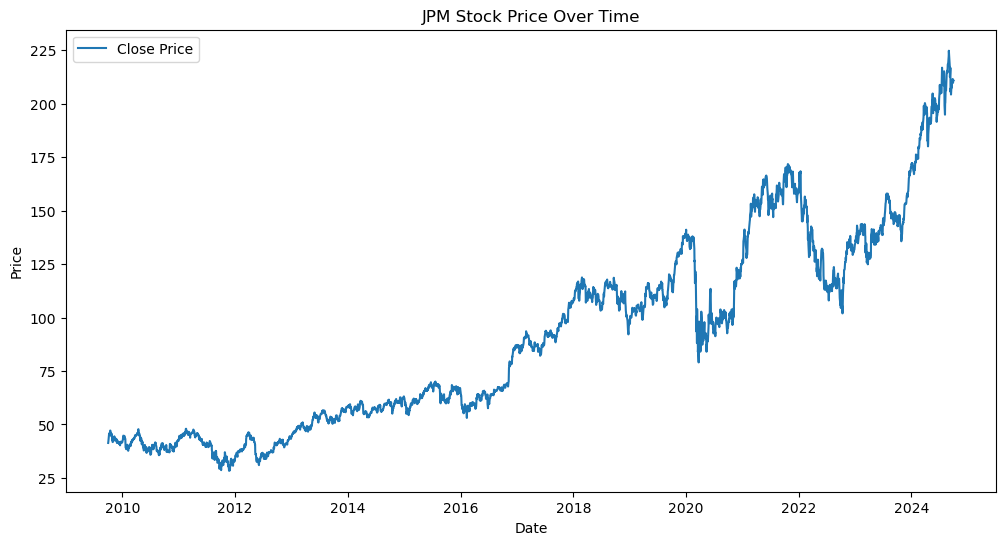

In [111]:


# Step 2: Fetch stock data
STOCK = 'MSFT'  # Replace 'AAPL' with the desired ticker symbol
postgres = yf.download(ticker_symbol, start='2009-10-01', end='2024-10-01')

# Step 3: Perform EDA
# Display the first few rows of the stock data
print("Stock Data Head:")
print(postgres.head())

# Summary statistics
print("\nSummary Statistics:")
print(postgres.describe())

# Visualize the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(postgres['Close'], label='Close Price')
plt.title(f'{ticker_symbol} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



# # Step 4: Save to PostgreSQL
# # Database connection parameters
# db_user = 'your_username'
# db_password = 'your_password'
# db_host = 'localhost'  # or your database host
# db_port = '5432'       # default port for PostgreSQL
# db_name = 'your_database_name'

# # Create a database engine
# engine = create_engine(f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# # Save the stock data to the database
# postgres.to_sql('postgres', engine, if_exists='replace', index=True)

# print("Stock data has been saved to the database.")


#ETL - Includes Data cleaning , Data transformation 

[*********************100%***********************]  1 of 1 completed

Stock Data Head:
Price       Adj Close      Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                                       
2009-10-01  18.648457  24.879999  25.469999  24.799999  25.410000  75958100
2009-10-02  18.708410  24.959999  25.090000  24.430000  24.459999  51219700
2009-10-05  18.468569  24.639999  25.059999  24.520000  24.980000  60804900
2009-10-06  18.820847  25.110001  25.209999  24.660000  24.680000  48795300
2009-10-07  18.813351  25.100000  25.180000  24.879999  24.990000  38472700

Summary Statistics:
Price     Adj Close        Close         High          Low         Open  \
Ticker         MSFT         MSFT         MSFT         MSFT         MSFT   
count   3774.000000  3774.000000  3774.000000  3774.000000  3774.000000   
mean     122.987628   128.922825   130.113458   127.606505   128.890832   
std      119.799860   119.228336   120.312195   118.02

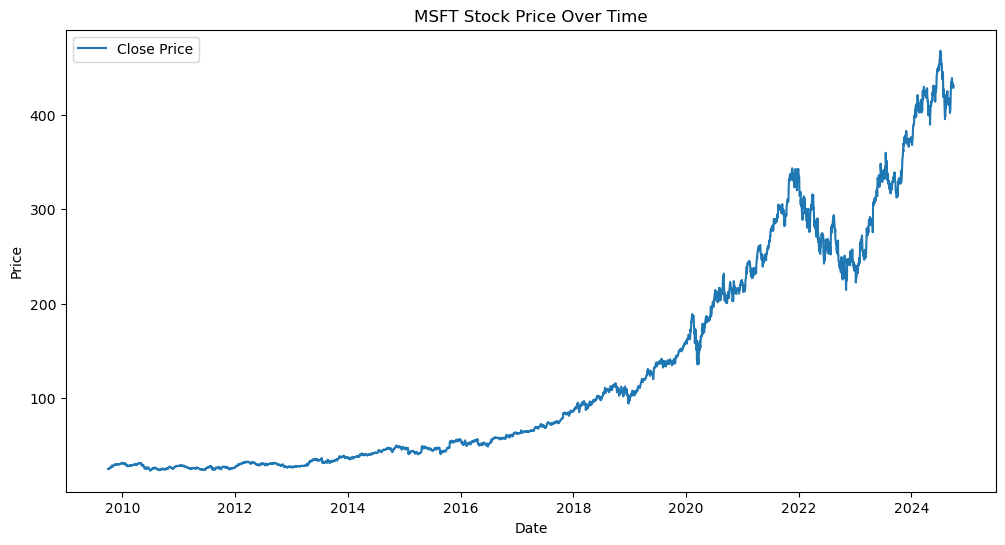

In [112]:
import yfinance as yf
import matplotlib.pyplot as plt

def fetch_postgres(ticker_symbol, start_date, end_date):
    """
    Fetch stock data for a given ticker symbol and date range.
    """
    return yf.download(ticker_symbol, start=start_date, end=end_date)

def perform_eda(postgres):
    """
    Perform exploratory data analysis on the stock data.
    """
    # Display the first few rows of the stock data
    print("Stock Data Head:")
    print(postgres.head())

    # Summary statistics
    print("\nSummary Statistics:")
    print(postgres.describe())

def visualize_stock_price(postgres, ticker_symbol):
    """
    Visualize the stock price over time.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(postgres['Close'], label='Close Price')
    plt.title(f'{ticker_symbol} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    ticker_symbol = STOCK  # Replace 'AAPL' with the desired ticker symbol
    start_date = '2009-10-01'
    end_date = '2024-10-01'

    # Fetch stock data
    postgres = fetch_postgres(ticker_symbol, start_date, end_date)

    # Perform EDA
    perform_eda(postgres)

    # Visualize stock price
    visualize_stock_price(postgres, ticker_symbol)

In [91]:
# Define variables
STOCK_SYMBOL = STOCK
PERIOD = '1mo'
INTERVAL = '1d'

In [113]:
import yfinance as yf
import psycopg2
from psycopg2 import sql

# Database connection parameters
db_params = {
    'dbname': 'postgres',
    'user': 'cosc',
    'password': 'cosc436',
    'host': 'postgres',
    'port': '5432'
}

# Function to fetch stock data
def fetch_postgres(stock_symbol):
    stock = yf.Ticker(stock_symbol)
    stock_info = stock.info
    return {
        'stock_symbol': stock_symbol,
        'company_name': stock_info.get('shortName', ''),
        'sector': stock_info.get('sector', ''),
        'currency': stock_info.get('currency', ''),
        'exchange': stock_info.get('exchange', '')
    }

# Function to fetch historical stock prices
def fetch_historical_data(stock_symbol, start_date='2009-01-01', end_date=None):
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(start=start_date, end=end_date)
    hist['RSI'] = calculate_rsi(hist['Close'])
    hist['SMA'] = hist['Close'].rolling(window=14).mean()
    hist['Bollinger_Upper'] = hist['SMA'] + (2 * hist['Close'].rolling(window=14).std())
    hist['Bollinger_Lower'] = hist['SMA'] - (2 * hist['Close'].rolling(window=14).std())
    return hist

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to insert data into the stock_dimension table
def insert_postgres(cur, postgres):
    insert_query = """
    INSERT INTO finance_schema.stock_dimension (stock_symbol, company_name, sector, currency, exchange) 
    VALUES (%s, %s, %s, %s, %s) 
    ON CONFLICT (stock_symbol) DO NOTHING;
    """
    cur.execute(insert_query, (
        postgres['stock_symbol'],
        postgres['company_name'],
        postgres['sector'],
        postgres['currency'],
        postgres['exchange']
    ))

# Function to insert date data into the date_dimension table
def insert_date_data(cur, historical_data):
    for date in historical_data.index:
        cur.execute("""
        INSERT INTO finance_schema.date_dimension (full_date, day_of_week, month, quarter, year, is_holiday) 
        VALUES (%s, %s, %s, %s, %s, %s) 
        ON CONFLICT (full_date) DO NOTHING;
        """, (
            date.date(),
            date.strftime('%A'),
            date.strftime('%B'),
            'Q' + str((date.month - 1) // 3 + 1),
            date.year,
            False  # Adjust this for holidays if needed
        ))

# Function to insert sector and exchange data
def insert_sector_and_exchange(cur, stock_data):
    sector_name = stock_data['sector']
    if sector_name:
        cur.execute("""
            INSERT INTO finance_schema.sector_dimension (sector_name) 
            VALUES (%s) 
            ON CONFLICT (sector_name) DO NOTHING;
        """, (sector_name,))

    exchange_name = stock_data['exchange']
    if exchange_name:
        cur.execute("""
            INSERT INTO finance_schema.exchange_dimension (exchange_name, country) 
            VALUES (%s, %s) 
            ON CONFLICT (exchange_name) DO NOTHING;
        """, (exchange_name, 'USA'))

# Function to insert historical stock data
def insert_historical_data(cur, stock_id, historical_data):
    insert_query = """
    INSERT INTO finance_schema.fact_stock_data
    (stock_id, date_id, open_price, close_price, high_price, low_price, volume, rsi, sma, bollinger_band)
    VALUES (
        %s, 
        (SELECT date_id FROM finance_schema.date_dimension WHERE full_date = %s LIMIT 1), 
        %s, %s, %s, %s, %s, %s, %s, %s
    )
    ON CONFLICT (stock_id, date_id) DO NOTHING;
    """

    for date, row in historical_data.iterrows():
        cur.execute(insert_query, (
            stock_id,
            date.date(),
            row['Open'],
            row['Close'],
            row['High'],
            row['Low'],
            row['Volume'],
            row['RSI'],
            row['SMA'],
            row['Bollinger_Upper']
        ))

def main(stock_symbol=STOCK, start_date='2009-01-01', end_date='2023-10-01'):
    # Establish database connection
    try:
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()

        # Fetch stock data
        postgres = fetch_postgres(stock_symbol)
        insert_sector_and_exchange(cur, postgres)
        insert_postgres(cur, postgres)

        # Retrieve stock_id for the inserted stock
        cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
        stock_id = cur.fetchone()[0]

        # Fetch historical stock price data
        historical_data = fetch_historical_data(stock_symbol, start_date, end_date)

        # Insert date data
        insert_date_data(cur, historical_data)

        # Insert historical data
        insert_historical_data(cur, stock_id, historical_data)

        # Commit and close
        conn.commit()
        cur.close()
        conn.close()

        print(f"Inserted historical data for {stock_symbol} into the database.")
    except Exception as e:
        print(f"Error: {e}")

# Run the main function
main(stock_symbol=STOCK, start_date='2009-01-01', end_date='2024-10-01')


Inserted historical data for MSFT into the database.


In [93]:
# Function to create or update the Moving Average Crossover table
def create_or_update_crossover_table(cur):
    # Create the table if it doesn't exist
    create_table_query = """
    CREATE TABLE IF NOT EXISTS finance_schema.moving_average_crossover (
        crossover_id SERIAL PRIMARY KEY,
        stock_id INT REFERENCES finance_schema.stock_dimension(stock_id),
        
        date_id INT REFERENCES finance_schema.date_dimension(date_id),
        short_ma DECIMAL(10, 2) NOT NULL,
        long_ma DECIMAL(10, 2) NOT NULL,
        price DECIMAL(10, 2) NOT NULL,
        crossover_signal VARCHAR(4) NOT NULL,
        UNIQUE (stock_id, date_id)
    );
    """
    cur.execute(create_table_query)

    # Add the `price` column if it doesn't already exist
    alter_table_query = """
    DO $$
    BEGIN
        IF NOT EXISTS (
            SELECT 1
            FROM information_schema.columns
            WHERE table_schema = 'finance_schema'
              AND table_name = 'moving_average_crossover'
              AND column_name = 'price'
        ) THEN
            ALTER TABLE finance_schema.moving_average_crossover 
            ADD COLUMN price DECIMAL(10, 2) NOT NULL;
        END IF;
    END $$;
    """
    cur.execute(alter_table_query)

    print("Table `moving_average_crossover` is ready.")

# Function to calculate moving average crossover signals with price
def calculate_ma_crossover_with_price(historical_data, short_window=50, long_window=200):
    historical_data['Short_MA'] = historical_data['Close'].rolling(window=short_window).mean()
    historical_data['Long_MA'] = historical_data['Close'].rolling(window=long_window).mean()
    historical_data['Crossover_Signal'] = (
        (historical_data['Short_MA'] > historical_data['Long_MA']).astype(int).diff()
    )
    historical_data['Crossover_Signal'] = historical_data['Crossover_Signal'].map({1: "BUY", -1: "SELL"})
    # Include price and filter rows with valid signals
    crossover_data = historical_data[['Close', 'Short_MA', 'Long_MA', 'Crossover_Signal']].dropna()
    return crossover_data[crossover_data['Crossover_Signal'].notnull()]


# Function to insert crossover data into the table with price
def insert_crossover_data_with_price(cur, stock_id, crossover_data):
    insert_query = """
    INSERT INTO finance_schema.moving_average_crossover
    (stock_id, date_id, short_ma, long_ma, price, crossover_signal)
    VALUES (
        %s,
        (SELECT date_id FROM finance_schema.date_dimension WHERE full_date = %s),
        %s, %s, %s, %s
    )
    ON CONFLICT DO NOTHING;
    """
    
    for date, row in crossover_data.iterrows():
        # Fetch the corresponding date_id from the date_dimension table
        # Pass the actual date object to match the full_date column in the date_dimension table.
        # Here, we're passing the actual date object (not formatted as string).
        cur.execute(insert_query, (
            stock_id,
            date.date(),  # Use the date object directly, not formatted string
            row['Short_MA'],
            row['Long_MA'],
            row['Close'],  # Price
            row['Crossover_Signal']
        ))





# Main function to process moving average crossovers with price
def process_crossover_with_price(stock_symbol, start_date='2009-01-01', end_date=None):
    # Establish database connection
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    # Step 1: Create or update the table
    # create_or_update_crossover_table(cur)

    # Step 2: Fetch stock_id
    cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
    stock_id = cur.fetchone()
    if not stock_id:
        print(f"Stock symbol {stock_symbol} not found in stock_dimension table.")
        conn.close()
        return
    stock_id = stock_id[0]

    # Step 3: Fetch historical data
    historical_data = fetch_historical_data(stock_symbol, start_date, end_date)

    # Step 4: Calculate crossover signals with price
    crossover_data = calculate_ma_crossover_with_price(historical_data)

    # Step 5: Insert crossover data into the table
    insert_crossover_data_with_price(cur, stock_id, crossover_data)

    # Commit and close
    conn.commit()
    cur.close()
    conn.close()

    print(f"Moving average crossover data with price processed and inserted for stock {stock_symbol}.")

# Run the process for a specific stock
process_crossover_with_price(stock_symbol=STOCK, start_date='2009-01-01', end_date='2024-10-01')


Moving average crossover data with price processed and inserted for stock JPM.


In [114]:
## simulating results
def insert_portfolio_history(cur, stock_id , trade_date, action, shares, capital, position, portfolio_value, stock_price):
    try:
        # print(trade_date, action, shares, capital, position, portfolio_value, stock_price)
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()
        insert_query = """
        INSERT INTO finance_schema.portfolio_history
        (stock_id, trade_date, action, shares, capital, position, portfolio_value, stock_price)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s);
        """
        cur.execute(insert_query, (stock_id, trade_date, action, shares, capital, position, portfolio_value, stock_price))
        conn.commit()
        print(f"Inserted portfolio history: {trade_date} {action} {shares} shares")
    except Exception as e:
        print(f"Error inserting portfolio history: {e}")

def simulate_portfolio(crossover_data, initial_capital=10000, cur=None, stock_id=None):
    capital = initial_capital
    position = 0  # Number of shares held
    trade_log = []  # To store trade details for later use
    buy_price = 0  # Track the buy price for profitability calculation

    for date, row in crossover_data.iterrows():
        price = row['Close']
        signal = row['Crossover_Signal']

        if signal == "BUY" and capital >= price:  # Ensure we can afford at least one share
            num_shares = capital // price  # Buy as many shares as possible
            capital -= num_shares * price
            position += num_shares
            buy_price = price  # Update the buy price
            trade_log.append({"date": date, "type": "BUY", "price": price, "shares": num_shares})

            # Insert portfolio history data after BUY
            portfolio_value = capital + position * price
            insert_portfolio_history(cur, 6, date.date(), "BUY", num_shares, capital, position, portfolio_value, price)

        elif signal == "SELL" and position > 0:  # Sell all shares
            capital += position * price
            trade_log.append({"date": date, "type": "SELL", "price": price, "shares": position})
            position = 0

            # Insert portfolio history data after SELL
            portfolio_value = capital + position * price
            insert_portfolio_history(cur, 6, date.date(), "SELL", position, capital, position, portfolio_value, price)

    # Final capital includes the value of remaining shares
    final_capital = capital + position * (crossover_data.iloc[-1]['Close'] if position > 0 else 0)

    # Calculate performance stats
    total_trades = len(trade_log)
    profitable_trades = 0

    # Calculate profitable trades (based on matching BUY and SELL prices)
    for i in range(1, len(trade_log)):
        if trade_log[i]["type"] == "SELL" and trade_log[i - 1]["type"] == "BUY":
            if trade_log[i]["price"] > trade_log[i - 1]["price"]:  # Check if selling price > buying price
                profitable_trades += 1

    win_ratio = (profitable_trades / (total_trades // 2)) * 100 if total_trades > 0 else 0
    cumulative_return = ((final_capital - initial_capital) / initial_capital) * 100

    return final_capital, total_trades, profitable_trades, win_ratio, cumulative_return, trade_log



def insert_backtesting_results(cur, stock_id, start_date, end_date, initial_capital, final_capital, 
                               total_trades, profitable_trades, win_ratio, cumulative_return):
    insert_query = """
    INSERT INTO finance_schema.backtesting_results
    (stock_id, start_date, end_date, initial_capital, final_capital, total_trades, 
     profitable_trades, win_ratio, cumulative_return)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
    ON CONFLICT (stock_id, start_date, end_date) DO UPDATE
    SET final_capital = EXCLUDED.final_capital,
        total_trades = EXCLUDED.total_trades,
        profitable_trades = EXCLUDED.profitable_trades,
        win_ratio = EXCLUDED.win_ratio,
        cumulative_return = EXCLUDED.cumulative_return;
    """
    cur.execute(insert_query, (stock_id, start_date, end_date, initial_capital, final_capital, 
                               total_trades, profitable_trades, win_ratio, cumulative_return))




def process_crossover_with_price(stock_symbol, start_date='2009-01-01', end_date='2024-10-01', initial_capital=10000):
    # try:
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()

           # Check if cursor is initialized correctly
        if cur is None:
            print("Cursor not initialized properly.")
            return  # Exit the function if the cursor is None

    

        cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
        stock_id = cur.fetchone()
        if not stock_id:
            raise ValueError(f"Stock symbol {stock_symbol} not found in stock_dimension table.")
        stock_id = stock_id[0]
    
        # Fetch historical data and process crossovers
         # Step 3: Fetch historical data
        historical_data = fetch_historical_data(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01')


        crossover_data = calculate_ma_crossover_with_price(historical_data)
        # insert_crossover_data_with_price(cur, stock_id, crossover_data)ing step to check the columns of the dataframe
        for date, row in crossover_data.iterrows():
            print("Row:", row)
            price = row['Close']  # Update this line based on actual column name
            signal = row['Crossover_Signal']

        # print("Crossover Data Preview:")
        # print(crossover_data.head())

        # Run simulation and save results
        final_capital, total_trades, profitable_trades, win_ratio, cumulative_return, trade_log = \
            simulate_portfolio(crossover_data, initial_capital)
    
        insert_backtesting_results(cur, stock_id  , start_date, end_date, initial_capital, final_capital, 
                                   total_trades, profitable_trades, win_ratio, cumulative_return);
    
        conn.commit()
    
        print(f"Backtesting completed for stock {stock_symbol}. Results inserted into the database.")
    
    # except Exception as e:
    #     print(f"Error during backtesting: {e}")
    #     conn.rollback()



process_crossover_with_price(stock_symbol=STOCK, start_date='2009-01-01', end_date='2024-10-01', initial_capital=10000)



Row: Close               5.665324
Short_MA            5.318517
Long_MA             4.011968
Crossover_Signal         BUY
Name: 2009-10-16 00:00:00-04:00, dtype: object
Row: Close               16.103466
Short_MA            18.092129
Long_MA             18.161851
Crossover_Signal         SELL
Name: 2012-12-10 00:00:00-05:00, dtype: object
Row: Close               15.322416
Short_MA            14.257092
Long_MA             14.208126
Crossover_Signal          BUY
Name: 2013-09-10 00:00:00-04:00, dtype: object
Row: Close               25.549538
Short_MA            27.157102
Long_MA             27.209525
Crossover_Signal         SELL
Name: 2015-08-28 00:00:00-04:00, dtype: object
Row: Close               24.416592
Short_MA             23.41007
Long_MA             23.404191
Crossover_Signal          BUY
Name: 2016-08-30 00:00:00-04:00, dtype: object
Row: Close               35.991753
Short_MA            45.939164
Long_MA             46.047411
Crossover_Signal         SELL
Name: 2018-12-21 00

In [ ]:
import psycopg2

# Connect to your database
conn = psycopg2.connect(
    database="postgres",
    user="cosc",
    password="cosc436",
    host="postgres",
    port="5432"  
)

# Create a cursor
cur = conn.cursor()

# Execute a query to get the data (adjust the query as needed)
cur.execute("SELECT * FROM finance_schema")

# Write the SQL statements to a file
with open("init.sql", "w") as f:
    for row in cur.fetchall():
        f.write(f"INSERT INTO your_table (column1, column2) VALUES ('{row[0]}', '{row[1]}');\n")

cur.close()
conn.close()

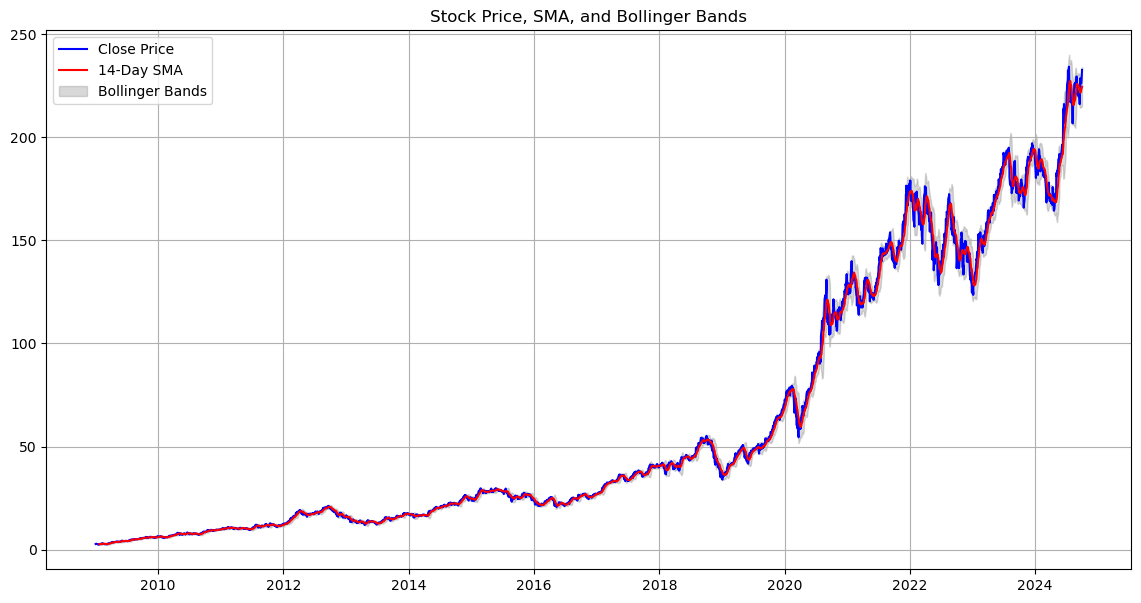

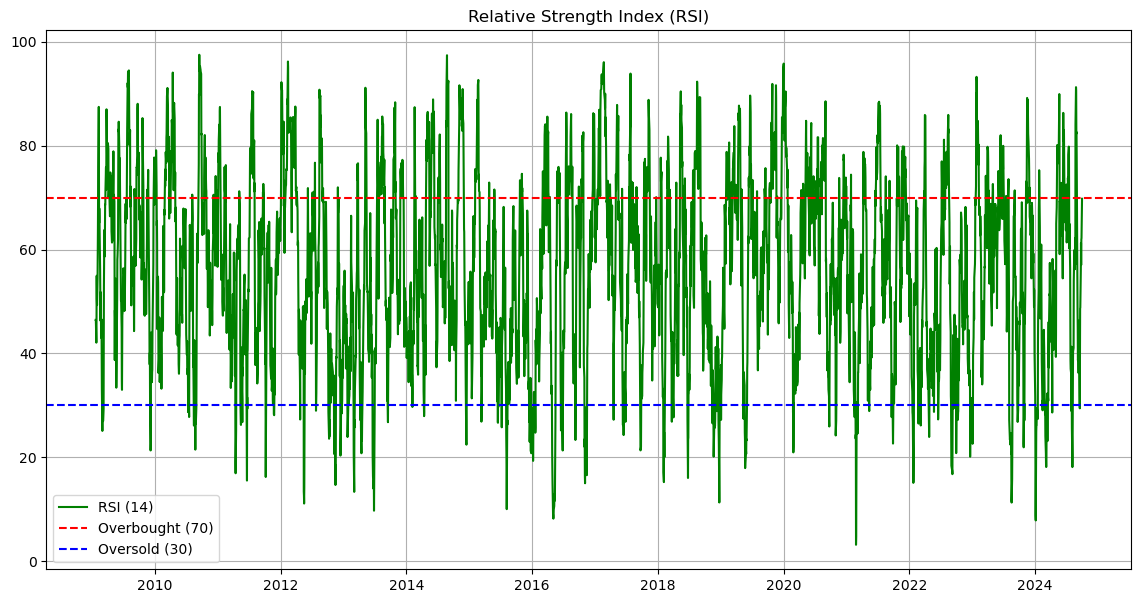

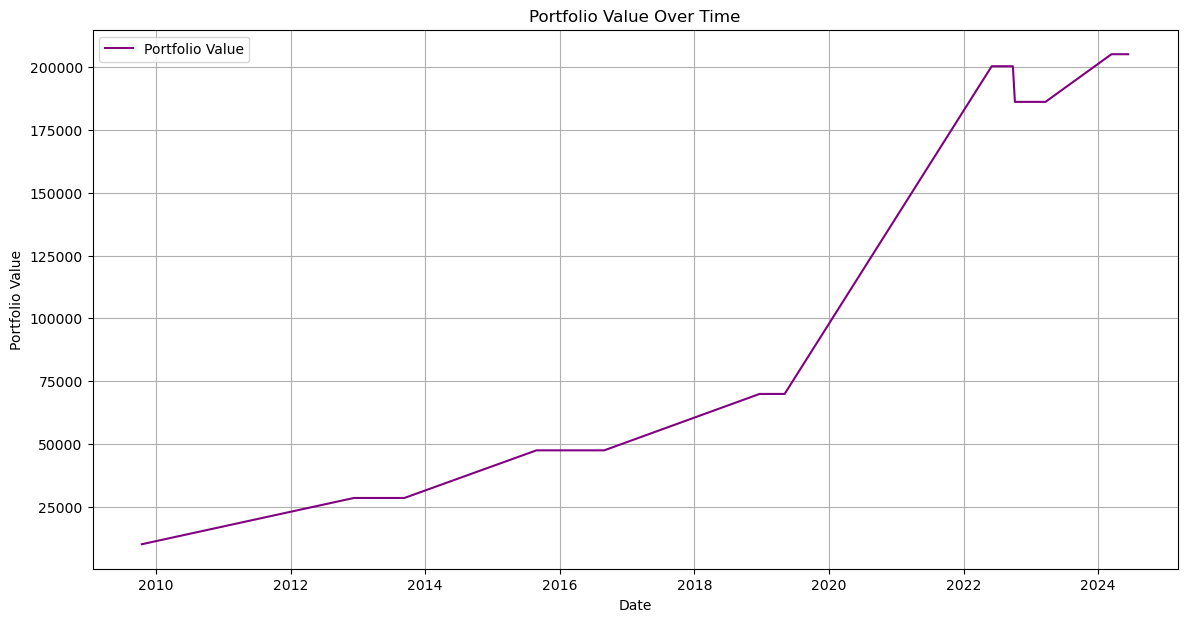

In [115]:
import yfinance as yf
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from psycopg2 import sql

# Fetch historical data from yfinance
def fetch_historical_data(stock_symbol, start_date='2009-01-01', end_date='2024-10-01'):
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(start=start_date, end=end_date)
    hist['RSI'] = calculate_rsi(hist['Close'])
    hist['SMA'] = hist['Close'].rolling(window=14).mean()
    hist['Bollinger_Upper'] = hist['SMA'] + (2 * hist['Close'].rolling(window=14).std())
    hist['Bollinger_Lower'] = hist['SMA'] - (2 * hist['Close'].rolling(window=14).std())
    return hist

# Calculate RSI (Relative Strength Index)
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Visualization function
def plot_stock_data(historical_data):
    # Plot closing price with SMA and Bollinger Bands
    plt.figure(figsize=(14, 7))
    plt.plot(historical_data['Close'], label='Close Price', color='blue')
    plt.plot(historical_data['SMA'], label='14-Day SMA', color='red')
    plt.fill_between(historical_data.index, historical_data['Bollinger_Upper'], historical_data['Bollinger_Lower'], 
                     color='gray', alpha=0.3, label='Bollinger Bands')
    plt.title('Stock Price, SMA, and Bollinger Bands')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot RSI
    plt.figure(figsize=(14, 7))
    plt.plot(historical_data['RSI'], label='RSI (14)', color='green')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to visualize portfolio performance
def plot_portfolio_performance(portfolio_data):
    # Assuming portfolio_data contains 'trade_date' and 'portfolio_value'
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio_data['trade_date'], portfolio_data['portfolio_value'], label='Portfolio Value', color='purple')
    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to fetch stock_id
def get_stock_id(stock_symbol, cur):
    cur.execute("SELECT stock_id FROM finance_schema.stock_dimension WHERE stock_symbol = %s", (stock_symbol,))
    stock_id = cur.fetchone()[0]
    return stock_id

# Function to fetch portfolio data from database
def fetch_portfolio_data(stock_id, cur):
    cur.execute("""
    SELECT trade_date, portfolio_value 
    FROM finance_schema.portfolio_history 
    WHERE stock_id = %s
    ORDER BY trade_date;
    """, (stock_id,))
    data = cur.fetchall()
    return pd.DataFrame(data, columns=['trade_date', 'portfolio_value'])

# Main function to execute the workflow
def main(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01'):
    # Connect to the database
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()

    # Get stock ID for the given stock symbol
    stock_id = get_stock_id(stock_symbol, cur)

    # Fetch historical stock price data
    historical_data = fetch_historical_data(stock_symbol, start_date, end_date)

    # Plot stock data (close price, SMA, RSI, Bollinger Bands)
    plot_stock_data(historical_data)

    # Fetch portfolio data and plot performance
    portfolio_data = fetch_portfolio_data(stock_id, cur)
    plot_portfolio_performance(portfolio_data)

    # Close the connection
    cur.close()
    conn.close()

# Run the main function
main(stock_symbol='AAPL', start_date='2009-01-01', end_date='2024-10-01')


/tmp/ipykernel_533/3992560186.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/3992560186.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


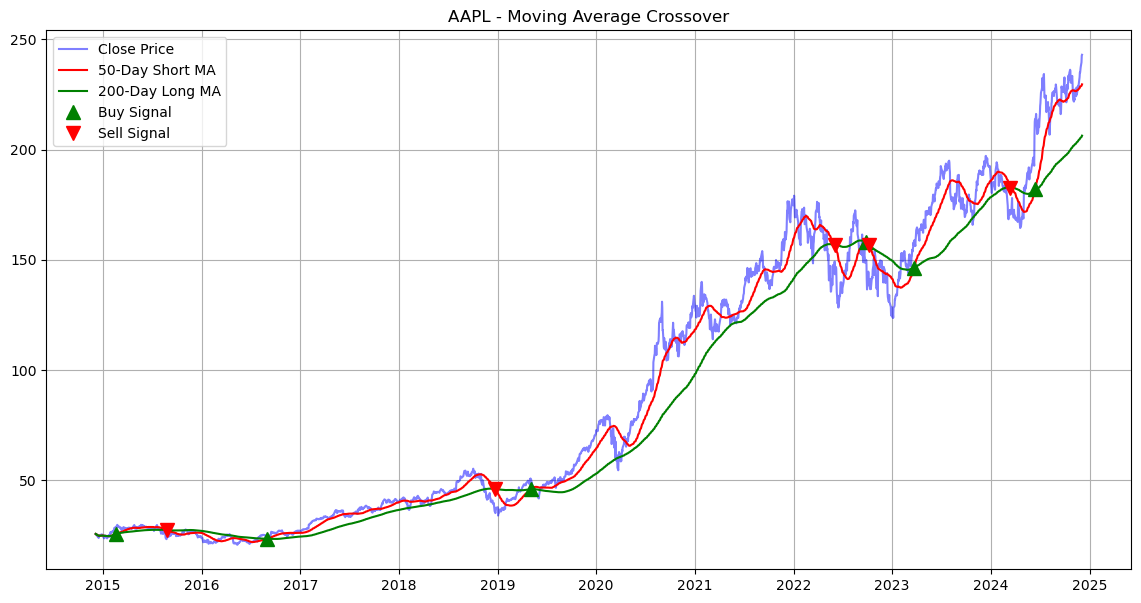

/tmp/ipykernel_533/3992560186.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/3992560186.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


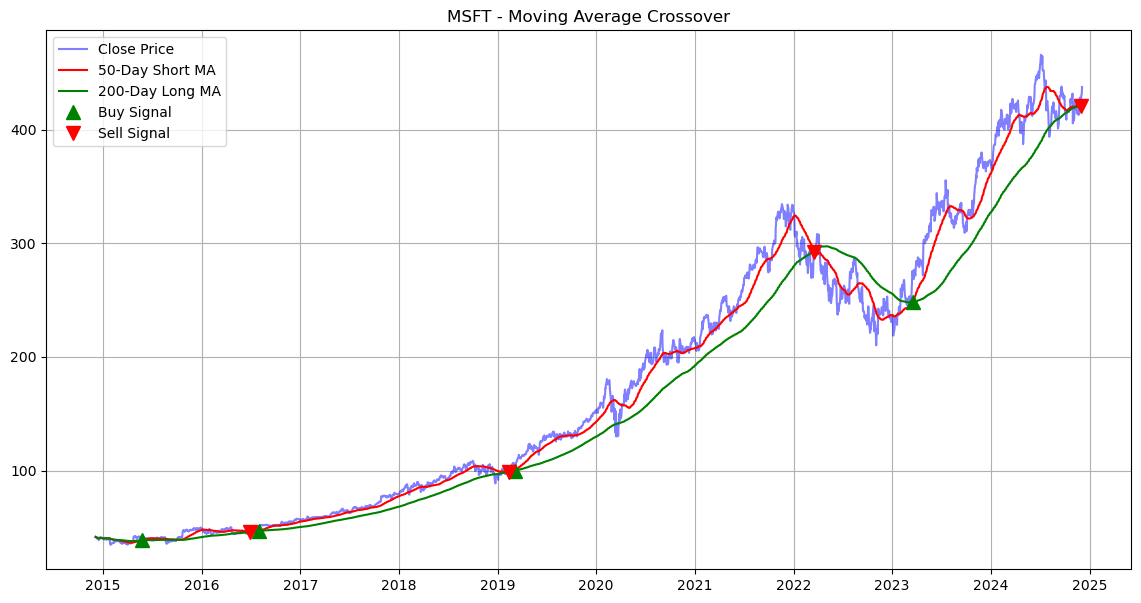

/tmp/ipykernel_533/3992560186.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/3992560186.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


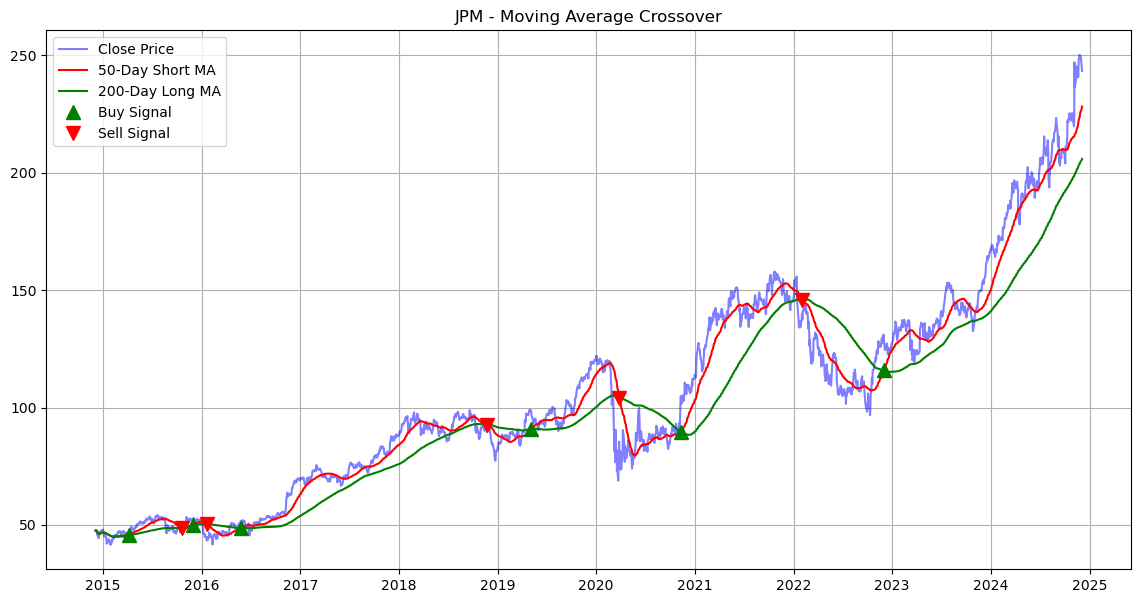

In [116]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate the moving averages and identify crossovers
def calculate_moving_averages(stock_symbol, short_window=50, long_window=200):
    # Fetch historical stock data
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(period='10y')  # You can adjust the period as needed

    # Calculate the short and long moving averages
    hist['Short_MA'] = hist['Close'].rolling(window=short_window, min_periods=1).mean()
    hist['Long_MA'] = hist['Close'].rolling(window=long_window, min_periods=1).mean()

    # Identify crossovers
    hist['Signal'] = 0  # 0 means no signal
    hist['Signal'][short_window:] = \
        [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]

    hist['Crossover'] = hist['Signal'].diff()
    
    return hist

# Function to plot the stock data and moving averages
def plot_moving_average_crossover(hist, stock_symbol):
    plt.figure(figsize=(14, 7))
    
    # Plot Closing Price, Short MA, and Long MA
    plt.plot(hist['Close'], label='Close Price', color='blue', alpha=0.5)
    plt.plot(hist['Short_MA'], label=f'{short_window}-Day Short MA', color='red')
    plt.plot(hist['Long_MA'], label=f'{long_window}-Day Long MA', color='green')
    
    # Plot buy signals (when short MA crosses above long MA)
    plt.plot(hist[hist['Crossover'] == 2].index, 
             hist['Short_MA'][hist['Crossover'] == 2], 
             '^', markersize=10, color='g', lw=0, label='Buy Signal')
    
    # Plot sell signals (when short MA crosses below long MA)
    plt.plot(hist[hist['Crossover'] == -2].index, 
             hist['Short_MA'][hist['Crossover'] == -2], 
             'v', markersize=10, color='r', lw=0, label='Sell Signal')

    plt.title(f'{stock_symbol} - Moving Average Crossover')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of stocks
stocks = ['AAPL', 'MSFT', 'JPM']

# Moving average windows
short_window = 50
long_window = 200

# Loop over the stocks and plot their moving average crossovers
for stock_symbol in stocks:
    hist = calculate_moving_averages(stock_symbol, short_window, long_window)
    plot_moving_average_crossover(hist, stock_symbol)


/tmp/ipykernel_533/2327048369.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/2327048369.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


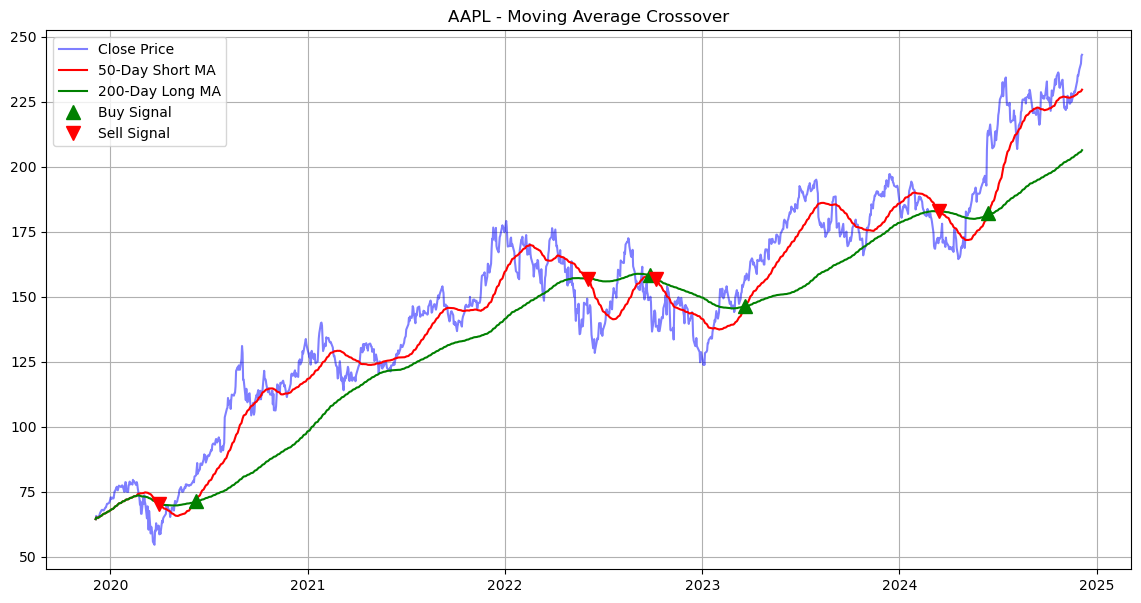

/tmp/ipykernel_533/2327048369.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/2327048369.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


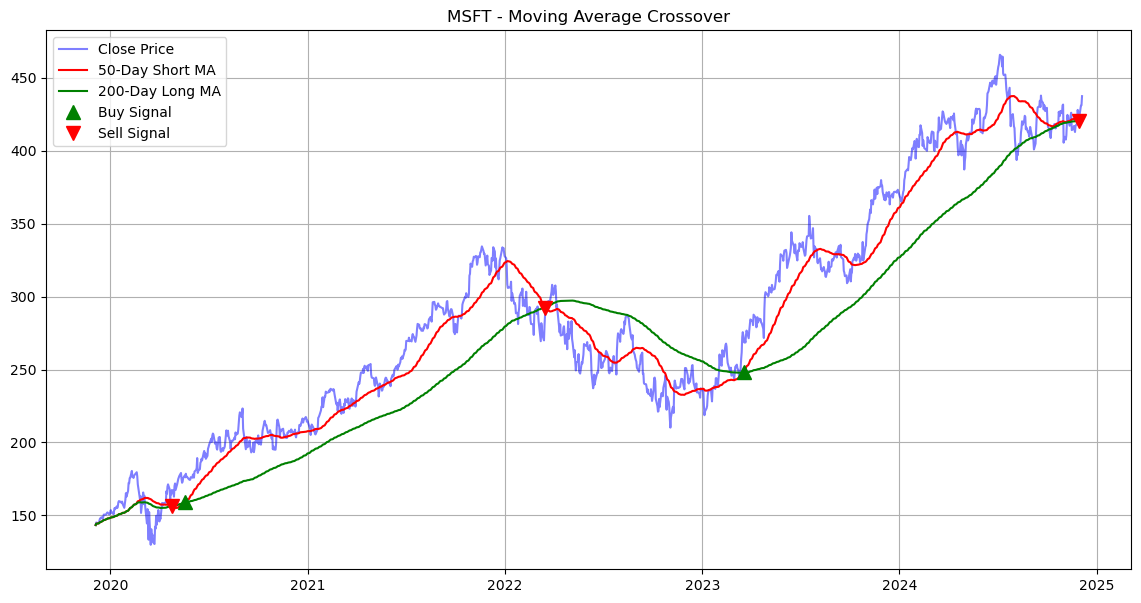

/tmp/ipykernel_533/2327048369.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/2327048369.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


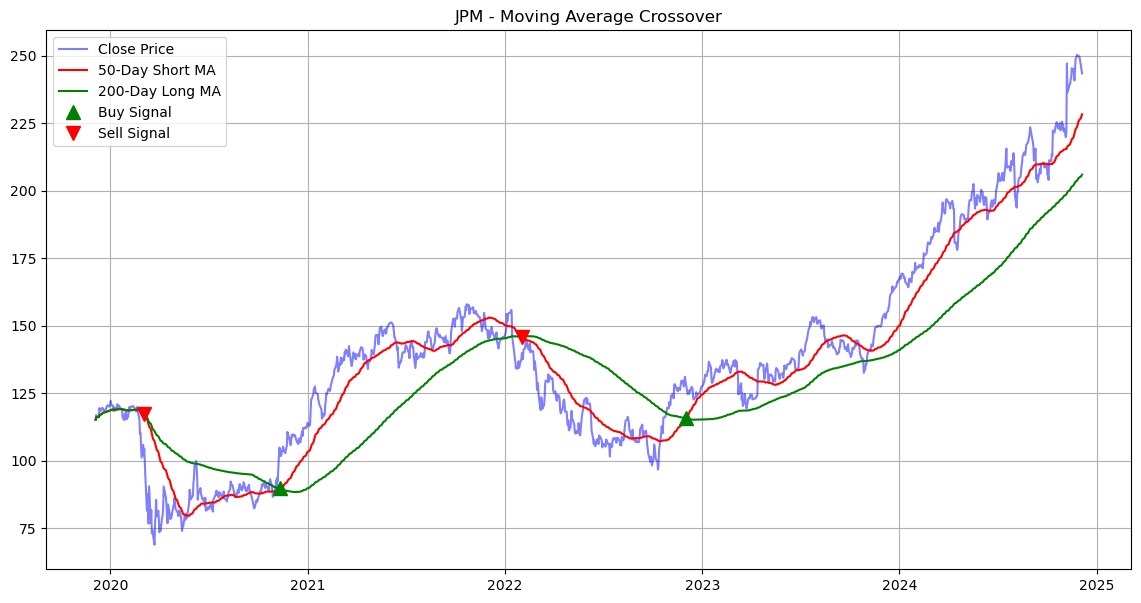

In [117]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to calculate the moving averages and identify crossovers
def calculate_moving_averages(stock_symbol, short_window=50, long_window=200):
    # Fetch historical stock data
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(period='5y')  # You can adjust the period as needed

    # Calculate the short and long moving averages
    hist['Short_MA'] = hist['Close'].rolling(window=short_window, min_periods=1).mean()
    hist['Long_MA'] = hist['Close'].rolling(window=long_window, min_periods=1).mean()

    # Identify crossovers
    hist['Signal'] = 0  # 0 means no signal
    hist['Signal'][short_window:] = \
        [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]

    hist['Crossover'] = hist['Signal'].diff()  # Identifies crossover points

    return hist

# Function to plot the stock data and moving averages
def plot_moving_average_crossover(hist, stock_symbol):
    plt.figure(figsize=(14, 7))
    
    # Plot Closing Price, Short MA, and Long MA
    plt.plot(hist['Close'], label='Close Price', color='blue', alpha=0.5)
    plt.plot(hist['Short_MA'], label=f'{short_window}-Day Short MA', color='red')
    plt.plot(hist['Long_MA'], label=f'{long_window}-Day Long MA', color='green')
    
    # Plot buy signals (when short MA crosses above long MA)
    buy_signal = hist[hist['Crossover'] == 2]  # Short MA crosses above Long MA
    plt.plot(buy_signal.index, 
             buy_signal['Short_MA'], 
             '^', markersize=10, color='g', lw=0, label='Buy Signal')
    
    # Plot sell signals (when short MA crosses below long MA)
    sell_signal = hist[hist['Crossover'] == -2]  # Short MA crosses below Long MA
    plt.plot(sell_signal.index, 
             sell_signal['Short_MA'], 
             'v', markersize=10, color='r', lw=0, label='Sell Signal')

    # Titles and Labels
    plt.title(f'{stock_symbol} - Moving Average Crossover')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of stocks to analyze
stocks = ['AAPL', 'MSFT', 'JPM']

# Moving average windows
short_window = 50
long_window = 200

# Loop over the stocks and plot their moving average crossovers
for stock_symbol in stocks:
    hist = calculate_moving_averages(stock_symbol, short_window, long_window)
    plot_moving_average_crossover(hist, stock_symbol)


/tmp/ipykernel_533/3354338478.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/3354338478.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


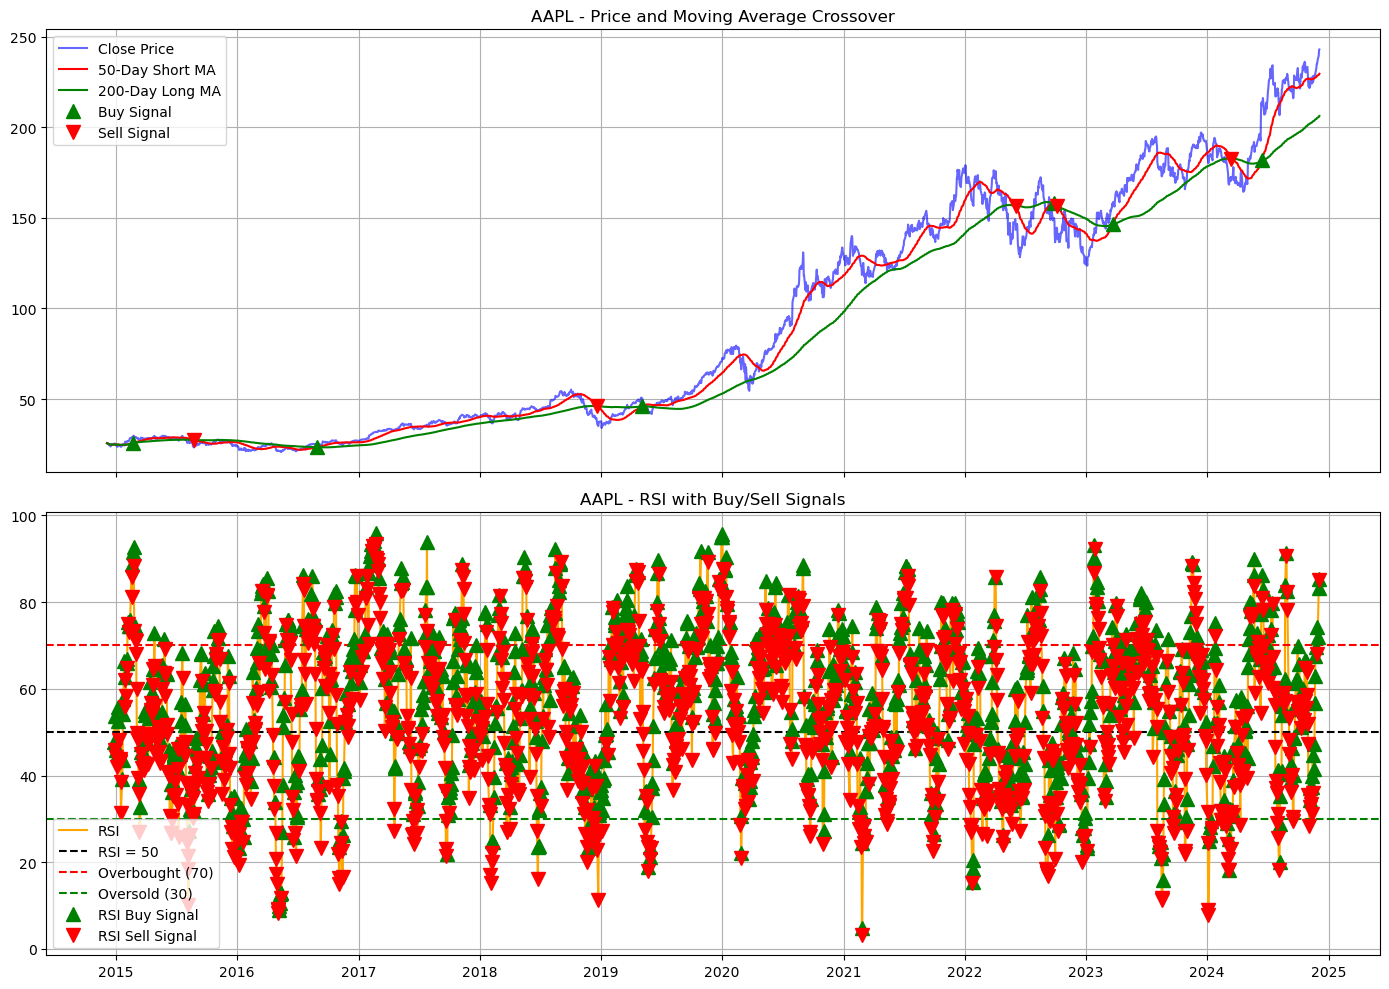

/tmp/ipykernel_533/3354338478.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/3354338478.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


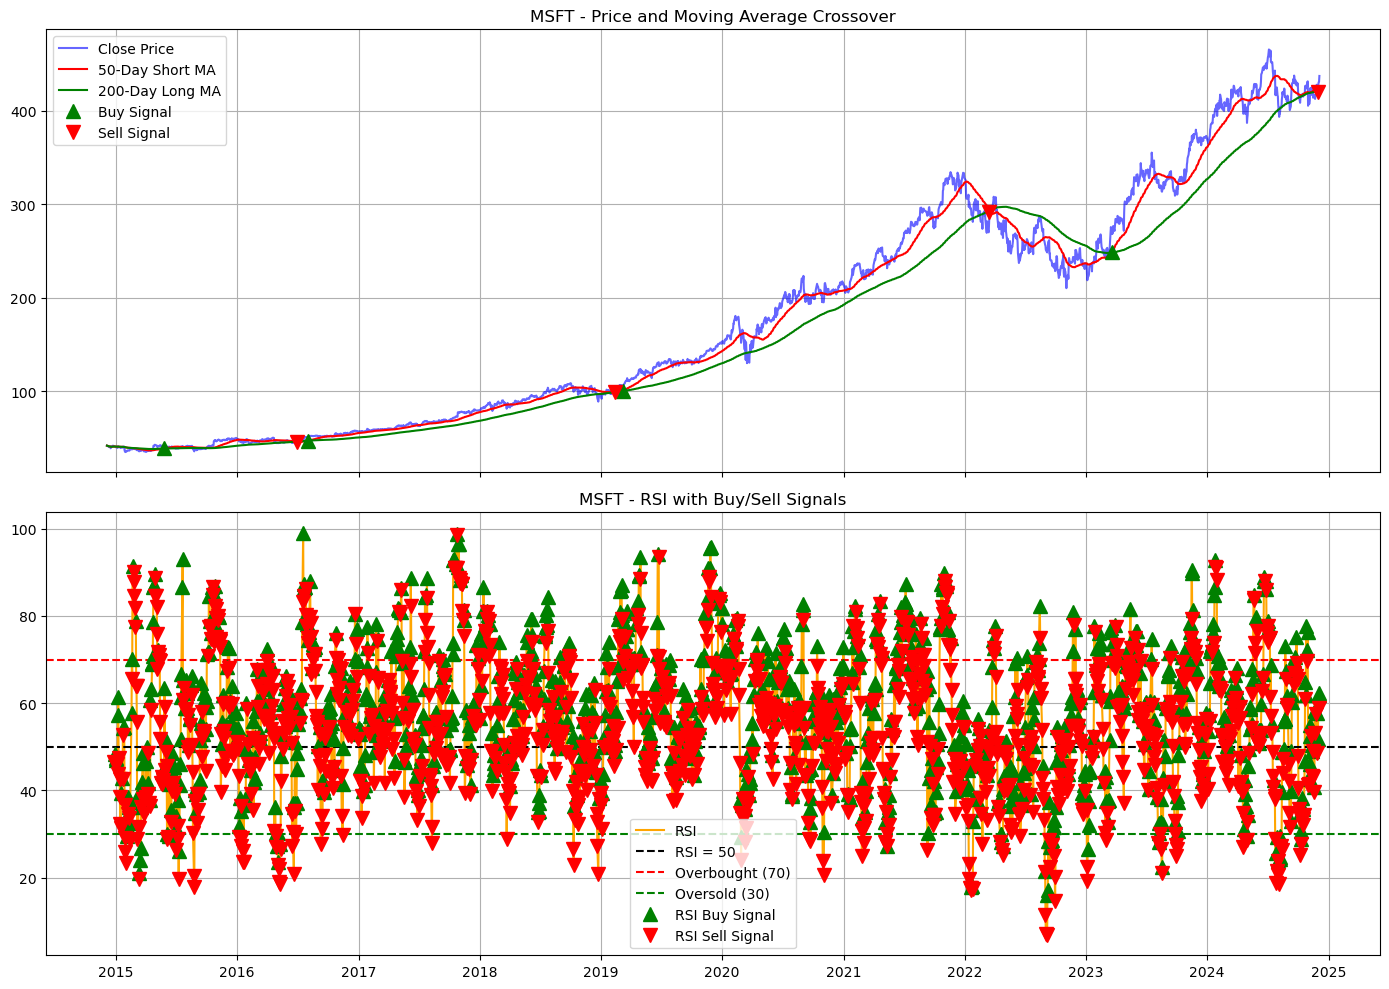

/tmp/ipykernel_533/3354338478.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]
/tmp/ipykernel_533/3354338478.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hist['Signal'][short_window:] = \


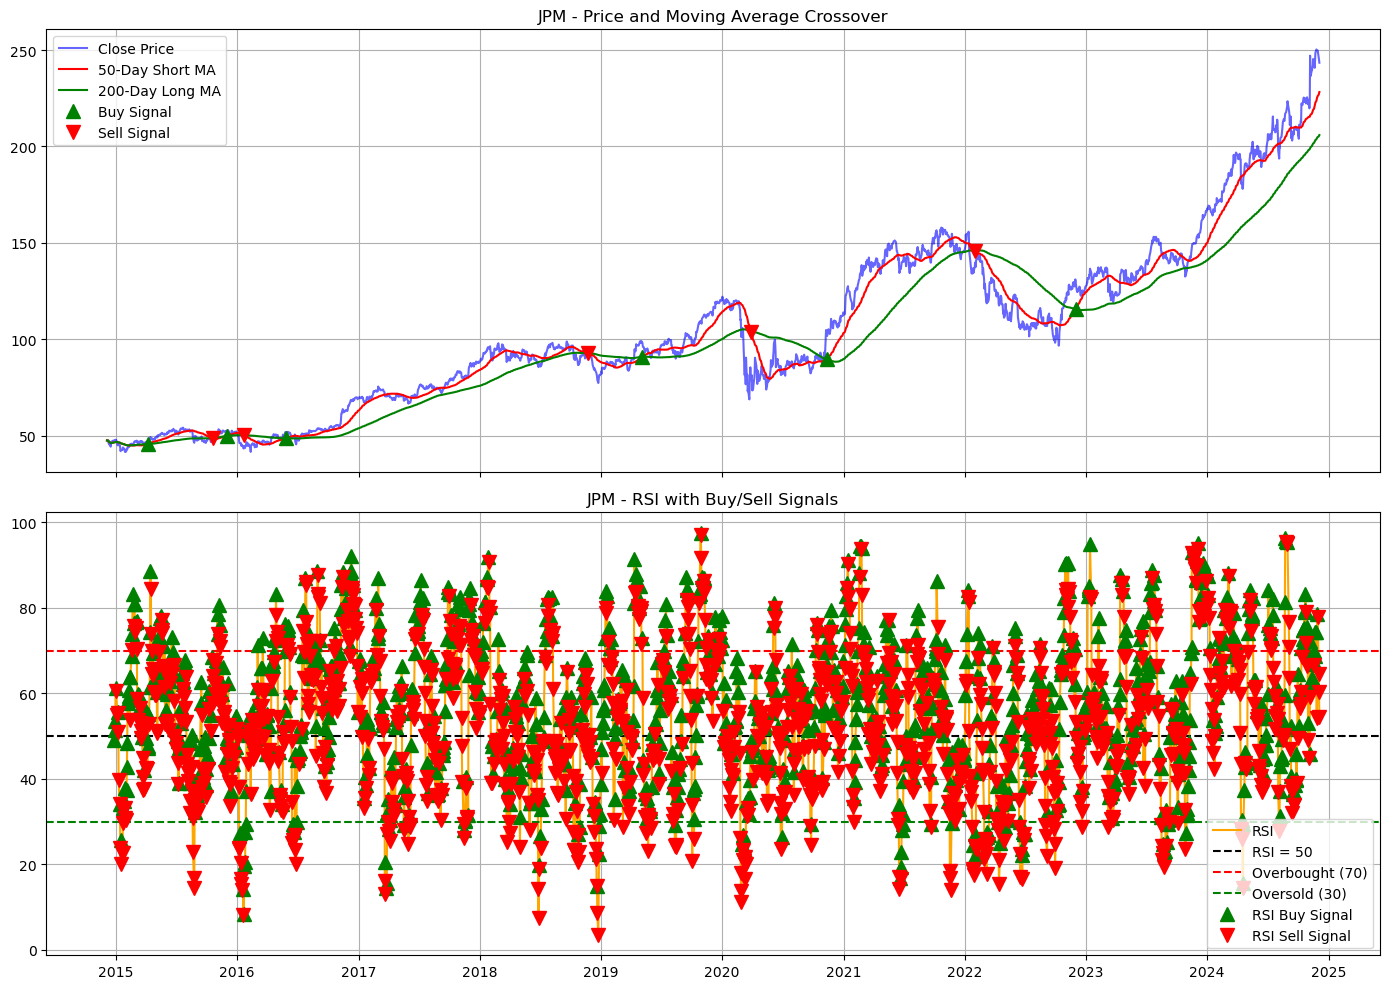

In [118]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate moving averages and RSI
def calculate_indicators(stock_symbol, short_window=50, long_window=200, rsi_window=14):
    # Fetch historical stock data
    stock = yf.Ticker(stock_symbol)
    hist = stock.history(period='10y')  # You can adjust the period as needed

    # Calculate the short and long moving averages
    hist['Short_MA'] = hist['Close'].rolling(window=short_window, min_periods=1).mean()
    hist['Long_MA'] = hist['Close'].rolling(window=long_window, min_periods=1).mean()

    # Calculate the RSI
    hist['RSI'] = calculate_rsi(hist['Close'], period=rsi_window)

    # Identify moving average crossovers
    hist['Signal'] = 0  # 0 means no signal
    hist['Signal'][short_window:] = \
        [1 if hist['Short_MA'][i] > hist['Long_MA'][i] else -1 for i in range(short_window, len(hist))]

    hist['Crossover'] = hist['Signal'].diff()  # Identifies crossover points

    # Identify RSI crossovers (when RSI crosses above 50 or below 50)
    hist['RSI_Crossover'] = hist['RSI'].diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    return hist

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Function to plot stock data, moving averages, and RSI
def plot_indicators(hist, stock_symbol, short_window=50, long_window=200):
    fig, axs = plt.subplots(2, figsize=(14, 10), sharex=True)

    # Plot the price and moving averages
    axs[0].plot(hist['Close'], label='Close Price', color='blue', alpha=0.6)
    axs[0].plot(hist['Short_MA'], label=f'{short_window}-Day Short MA', color='red')
    axs[0].plot(hist['Long_MA'], label=f'{long_window}-Day Long MA', color='green')

    # Plot buy/sell signals for MA crossovers
    buy_signal = hist[hist['Crossover'] == 2]  # Short MA crosses above Long MA
    axs[0].plot(buy_signal.index, buy_signal['Short_MA'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    
    sell_signal = hist[hist['Crossover'] == -2]  # Short MA crosses below Long MA
    axs[0].plot(sell_signal.index, sell_signal['Short_MA'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

    axs[0].set_title(f'{stock_symbol} - Price and Moving Average Crossover')
    axs[0].legend()
    axs[0].grid(True)

    # Plot the RSI and its crossover with the 50 line
    axs[1].plot(hist['RSI'], label='RSI', color='orange')
    axs[1].axhline(50, color='black', linestyle='--', label='RSI = 50')  # Threshold for RSI
    axs[1].axhline(70, color='red', linestyle='--', label='Overbought (70)')  # Overbought condition
    axs[1].axhline(30, color='green', linestyle='--', label='Oversold (30)')  # Oversold condition

    # Plot RSI crossover signals
    rsi_buy_signal = hist[hist['RSI_Crossover'] == 1]  # RSI crosses above 50
    axs[1].plot(rsi_buy_signal.index, rsi_buy_signal['RSI'], '^', markersize=10, color='g', lw=0, label='RSI Buy Signal')

    rsi_sell_signal = hist[hist['RSI_Crossover'] == -1]  # RSI crosses below 50
    axs[1].plot(rsi_sell_signal.index, rsi_sell_signal['RSI'], 'v', markersize=10, color='r', lw=0, label='RSI Sell Signal')

    axs[1].set_title(f'{stock_symbol} - RSI with Buy/Sell Signals')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# List of stocks to analyze
stocks = ['AAPL', 'MSFT', 'JPM']

# Moving average and RSI windows
short_window = 50
long_window = 200
rsi_window = 14

# Loop over the stocks and plot their moving averages and RSI
for stock_symbol in stocks:
    hist = calculate_indicators(stock_symbol, short_window, long_window, rsi_window)
    plot_indicators(hist, stock_symbol, short_window, long_window)
